In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read cvs file from URL
df = pd.read_csv('https://raw.githubusercontent.com/tangaritas/birds_food/main/pajarines.csv')
df

,Fecha,Hora,Descripción,Cantidad(g),Costo($),Mes,Unnamed: 6,Comidita,Costo/g ($),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1/3/2021,9:00,Papaya,227.0,385.9,marzo,NaN,Banano,2.4,NaN,NaN,NaN,NaN,NaN
1,1/3/2021,9:00,Plátano,165.0,379.5,marzo,NaN,Papaya,1.7,NaN,NaN,NaN,NaN,NaN
2,2/3/2021,9:30,Plátano,164.0,377.2,marzo,NaN,Plátano,2.3,NaN,NaN,NaN,NaN,NaN
3,3/3/2021,8:30,Banano,148.0,355.2,marzo,NaN,Naranja,4.0,NaN,NaN,NaN,NaN,NaN
4,3/3/2021,13:00,Banano,124.0,297.6,marzo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# to know data types in dataframe
df.dtypes

Fecha           object
Hora            object
Descripción     object
Cantidad(g)    float64
Costo($)       float64
Mes             object
Unnamed: 6     float64
Comidita        object
Costo/g ($)    float64
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
dtype: object

In [4]:
# drop irrelevant columns
df.drop(['Unnamed: 6', 'Comidita', 'Costo/g ($)', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [5]:
# drop rows with missing values 
df.dropna(inplace=True)
df

,Fecha,Hora,Descripción,Cantidad(g),Costo($),Mes
0,1/3/2021,9:00,Papaya,227.0,385.9,marzo
1,1/3/2021,9:00,Plátano,165.0,379.5,marzo
2,2/3/2021,9:30,Plátano,164.0,377.2,marzo
3,3/3/2021,8:30,Banano,148.0,355.2,marzo
4,3/3/2021,13:00,Banano,124.0,297.6,marzo
...,...,...,...,...,...,...
105,13/7/2021,10:30,Plátano,251.0,577.3,julio
106,14/7/2021,10:30,Plátano,238.0,547.4,julio
107,15/7/2021,7:30,Plátano,305.0,701.5,julio
108,15/7/2021,16:00,Plátano,249.0,572.7,julio


Birds have been eaten in five months 17524 g plantain, 3931 g banana, 1660 g papaya and 1097 g orange.

In [6]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Descripción","type":"nominal","sort":{"field":"Cantidad(g)","op":"sum","order":"descending"},"scale":{"type":"linear","zero":false}},"y":{"field":"Cantidad(g)","type":"quantitative","sort":{"field":"Cantidad(g)","op":"sum","order":"descending"},"scale":{"type":"linear","zero":true},"aggregate":"sum"},"color":{"field":"Descripción","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

vs cost

In [7]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Costo($)","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Cantidad(g)","type":"quantitative","sort":{"field":"Cantidad(g)","op":"sum","order":"descending"},"scale":{"type":"linear","zero":false},"aggregate":"sum"},"color":{"field":"Descripción","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [8]:
# Descriptive statistic
df.describe()

,Cantidad(g),Costo($)
count,110.000000,110.000000
mean,220.109091,517.723636
std,69.579648,178.793320
min,72.000000,122.400000
25%,164.250000,377.250000
50%,232.500000,547.400000
75%,272.750000,648.025000
max,416.000000,988.000000


In [9]:
# Group by fruits 
df_fruits = df.groupby('Descripción').sum()
df_fruits

,Cantidad(g),Costo($)
Descripción,,
Banano,3931.0,9434.4
Naranja,1097.0,4388.0
Papaya,1660.0,2822.0
Plátano,17524.0,40305.2


In [10]:
# sum columns
df_fruits.sum()

Cantidad(g)    24212.0
Costo($)       56949.6
dtype: float64

In [11]:
# mean by month
df_month = df.groupby('Mes').sum()

In [12]:
df_month.describe()

,Cantidad(g),Costo($)
count,5.000000,5.000000
mean,4842.400000,11389.920000
std,1339.380566,3563.025181
min,3195.000000,7317.900000
25%,4198.000000,9688.100000
50%,4500.000000,10207.900000
75%,5680.000000,13177.600000
max,6639.000000,16558.100000


Text(0.5, 1.0, 'Lo que han comido las aves en mi ventana en los cinco últimos meses\n')

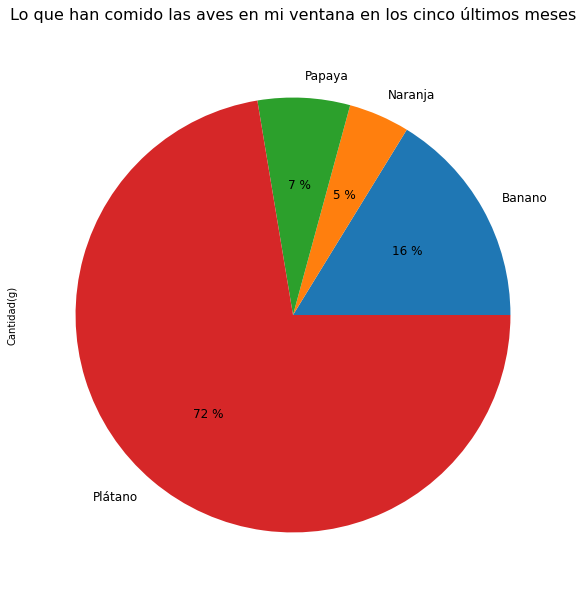

In [13]:
df_fruits['Cantidad(g)'].plot.pie(autopct=lambda p:f'{p:.0f} %', figsize=(10, 10), fontsize=12)
plt.title('Lo que han comido las aves en mi ventana en los cinco últimos meses\n', size=16)

<AxesSubplot:ylabel='Costo($)'>

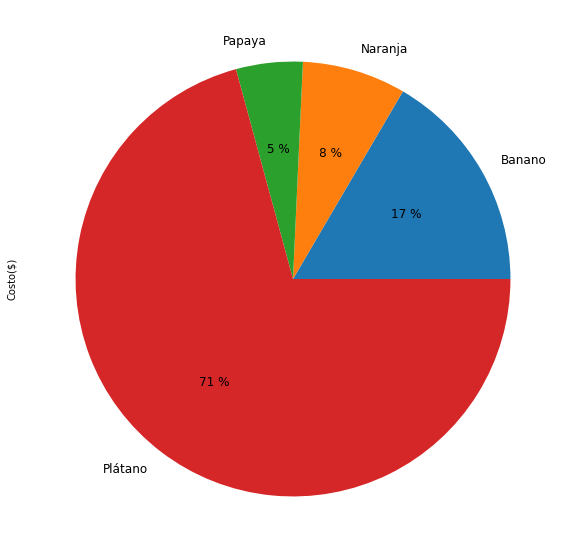

In [14]:
df_fruits['Costo($)'].plot.pie(autopct=lambda p:f'{p:.0f} %', figsize=(10, 10), fontsize=12)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a10a3ae-af2e-4ded-9363-bd765cc1ebd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>